# Páginas para programar python
## Rodrigo Sánchez Castañeda - A00829528
### En esta presentación analizaremos el rendimiento de los alumnos tomando en cuenta diferentes factores, como lo son las horas libres, el consumo de alcohol, relaciones, entre otras que son aspectos que rodean a la vida de un estudiante en su dia a dia.

##### famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
##### freetime - free time after school (numeric: from 1 - very low to 5 - very high)
##### goout - going out with friends (numeric: from 1 - very low to 5 - very high)
##### Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
##### Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
##### health - current health status (numeric: from 1 - very bad to 5 - very good)
##### absences - number of school absences (numeric: from 0 to 93)

In [4]:
#%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('student-yield.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


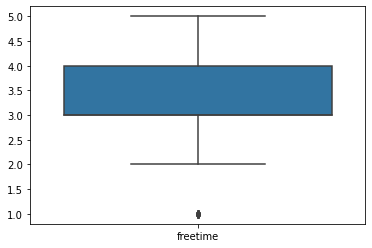

In [7]:
sns.boxplot(data=df.loc[:,['freetime']])

In [10]:
# como podemos observar en la boxplot anterior contamos con un outlier, el cual es una anomalia dentro del conjuto que tiene como 3.5 horas libres promedio dentro de todos los estudiantes.

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## ¿Cómo afectan las horas de estudio en el rendimiento de los alumnos?

In [57]:
tabla = pd.pivot_table(df,
                       index = ['age'],
                       columns = ['studytime'],
                       values = ['failures'],
                      )
tabla

failures                              
studytime         1         2         3         4
age                                              
15         0.190476  0.342105  0.333333  0.090909
16         0.323529  0.222222  0.090909  0.000000
17         0.600000  0.140000  0.105263  0.000000
18         0.764706  0.261905  0.000000  0.000000
19         1.200000  1.230769  1.200000  0.000000
20         0.000000  2.000000  2.000000       NaN
21         3.000000       NaN       NaN       NaN
22         3.000000       NaN       NaN       NaN

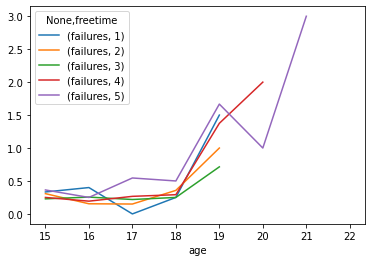

In [56]:
tabla.plot(kind = 'line')

In [19]:
# Como se puede observar en la gráfica entre mayor número de horas libres tengan los estudiantes mayor cantidad de materias reprobadas tienen.

## ¿Cómo afecta el alcohol en el rendimiento de los estudiantes?

In [51]:
tabla2 = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['sex'],
                     values = ['Dalc', 'Walc'],
 
                    )
tabla2

Dalc                Walc          
sex         F         M         F         M
age                                        
15   1.315789  1.386364  1.842105  1.954545
16   1.240741  1.640000  2.037037  2.540000
17   1.241379  1.925000  2.120690  3.225000
18   1.232558  1.897436  1.767442  3.128205
19   1.285714  1.700000  1.928571  2.000000
20   1.000000  2.500000  1.000000  3.000000
21        NaN  3.000000       NaN  3.000000
22        NaN  5.000000       NaN  5.000000

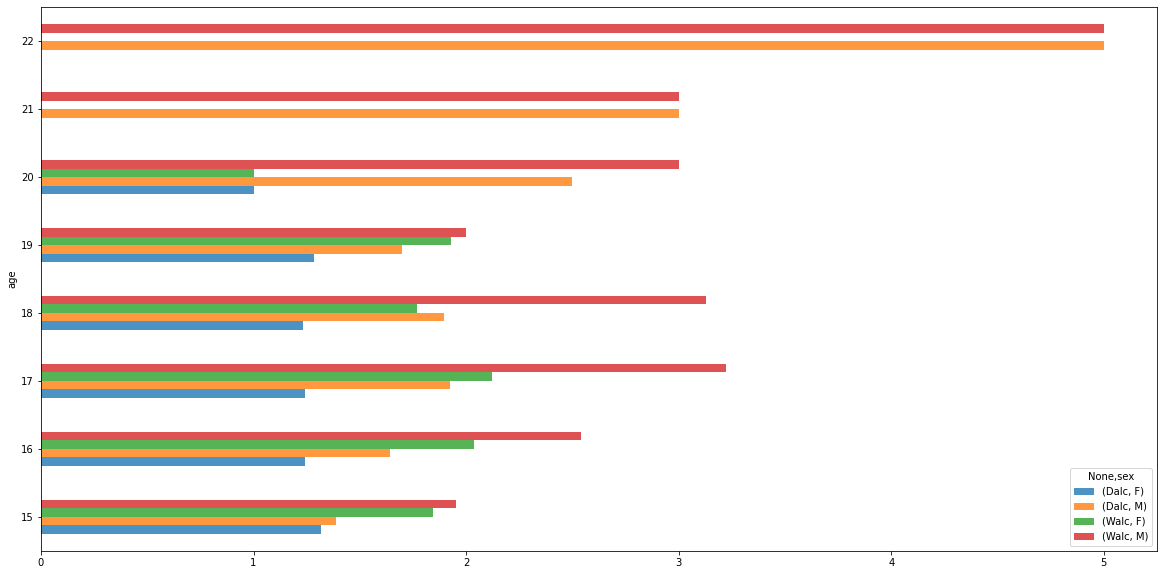

In [52]:
tabla2.plot(kind = 'barh',
           figsize = (20,10),
           alpha = 0.8)

In [35]:
# Podemos observar como es que el consumir alcohol afecta en general el rendimiento en los estudiantes, sin importar edad ni el momento que lo consuman.

## ¿Cómo ayuda tener apoyo familiar a los estudiantes?

In [46]:
tabla3 = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['famsup'],
                     values = ['failures'],
 
                    )
tabla3

failures          
famsup        no       yes
age                       
15      0.375000  0.224138
16      0.236842  0.227273
17      0.210526  0.266667
18      0.315789  0.272727
19      1.250000  1.083333
20      0.000000  2.000000
21      3.000000       NaN
22      3.000000       NaN

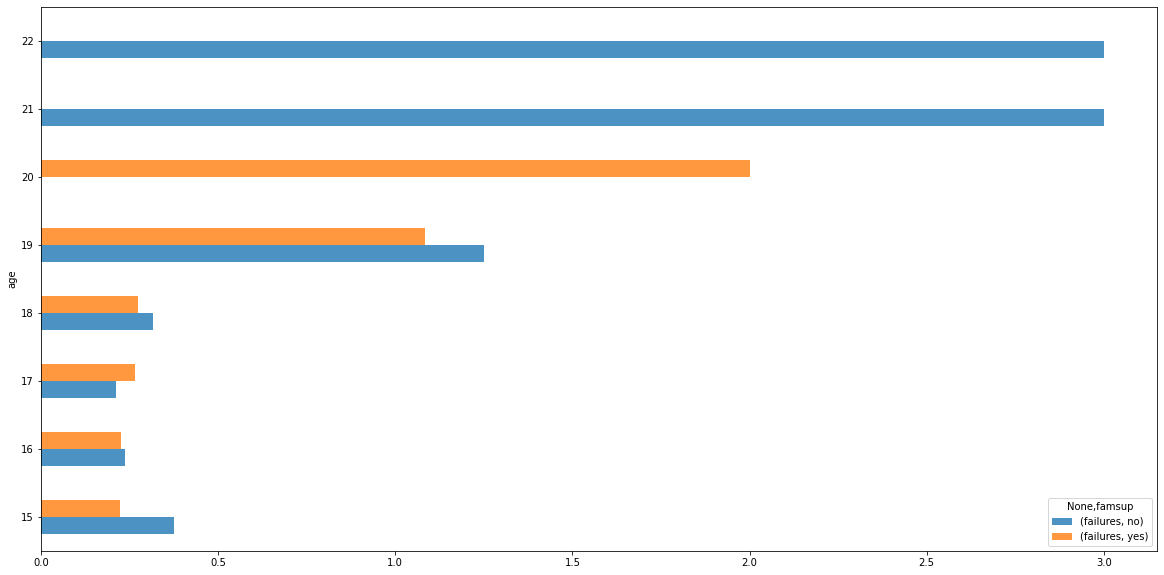

In [50]:
tabla3.plot(kind = 'barh',
           figsize = (20,10),
           alpha = 0.8)

In [58]:
# Como podemos observar, en las menores edades es importante el family suport, sin embargo, conforme van creciendo esto va tomando una creciente el cual no reciben apoyo y son más aptos para reprobar.

## ¿Cómo afecta las inasistencias en el rendimiento de los alumnos?

In [67]:
tabla4 = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['activities'],
                     values = ['failures'],
 
                    )
tabla4

failures          
activities        no       yes
age                           
15          0.461538  0.093023
16          0.166667  0.274194
17          0.196078  0.297872
18          0.272727  0.315789
19          1.285714  1.000000
20          2.000000  0.000000
21          3.000000       NaN
22          3.000000       NaN

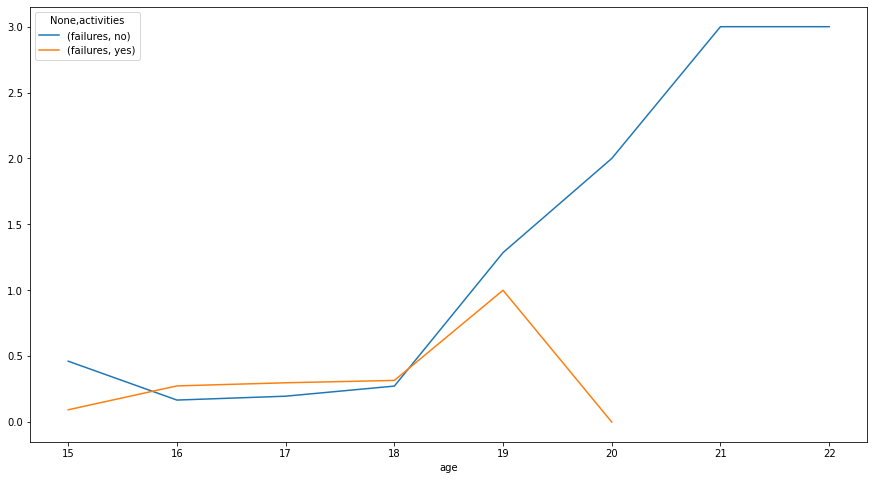

In [68]:
tabla4.plot(kind='line',
             figsize = (15,8))

In [69]:
# Podemos observar que como las actividades extracurriculares no tienen relación directa con las materias reprobadas

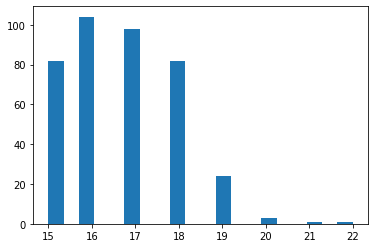

In [74]:
data = [df.loc[:,'age'],]
patches = plt.hist(data, bins = 20)

In [75]:
# Podemos observar que en el rango de 15-18 son la mayoria de edades en la escuela.